<a href="https://colab.research.google.com/github/JahedNaghipoor/Machine-Learning/blob/master/Support_Vector_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Support Vector Machine - 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [ ]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [ ]:
#construct dataframe:
df = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns = np.append(cancer['feature_names'], 'target'))
df.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0.0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0.0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0.0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0.0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0.0


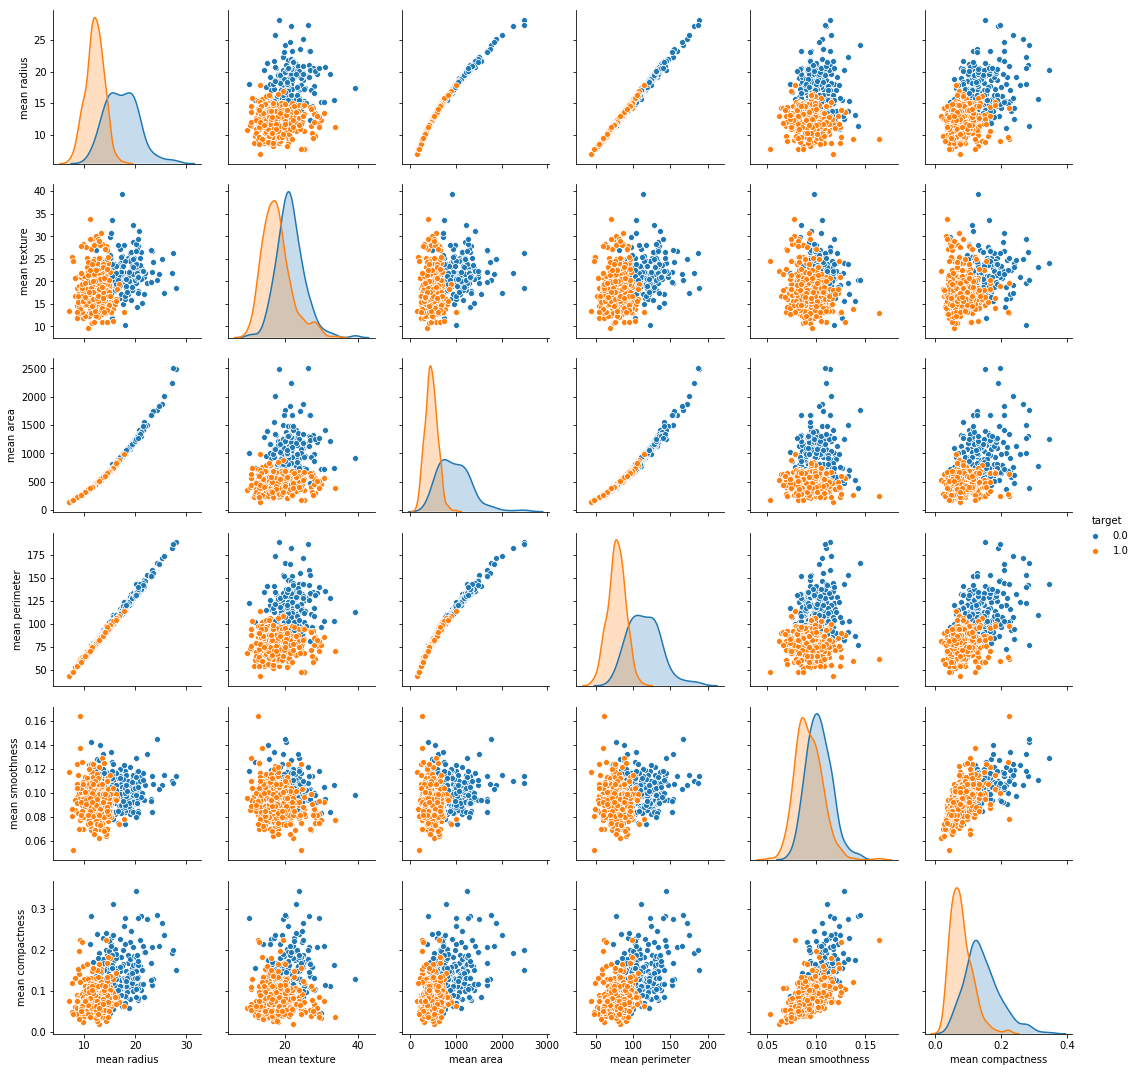

In [ ]:
sns.pairplot(df, hue='target', vars=['mean radius', 'mean texture', 'mean area', 'mean perimeter', 'mean smoothness', 'mean compactness'])

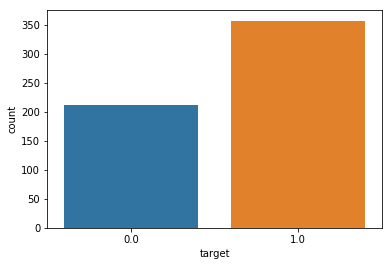

In [ ]:
sns.countplot(df['target'], label='Count')

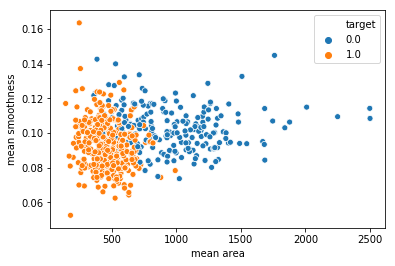

In [ ]:
# separation of data (mean area vs mean smoothness)
sns.scatterplot(x = 'mean area', y = 'mean smoothness', hue='target', data = df)

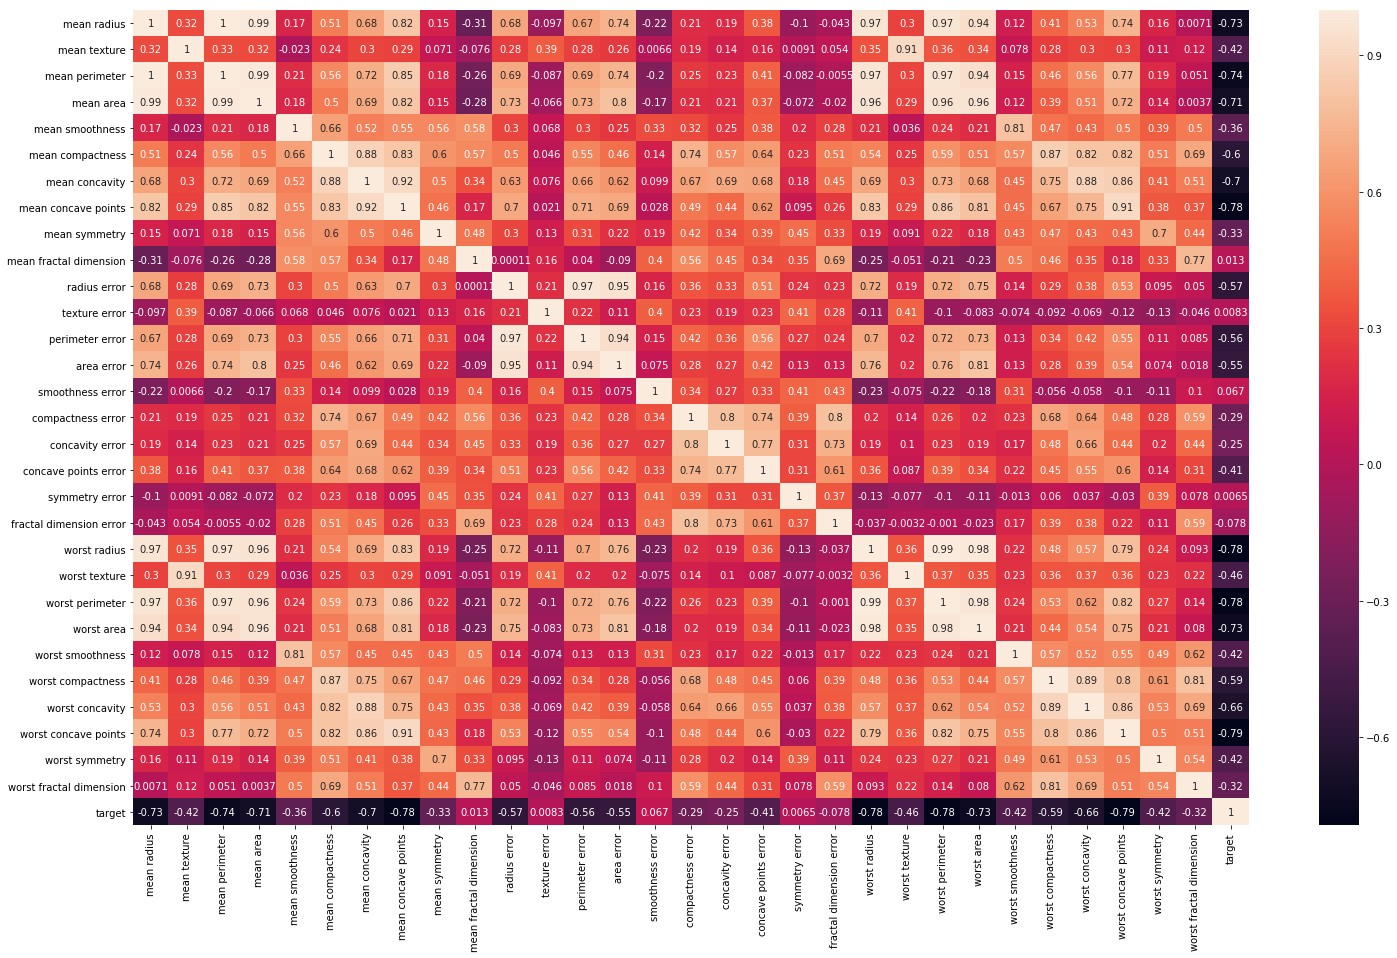

In [ ]:
# Corrolation between features
plt.figure(figsize =(25,15))
sns.heatmap(df.corr(), annot=True)

In [ ]:
X = df.drop(['target'], axis =1)
y = df['target']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
svc_model = SVC()
svc_model.fit(X_train, y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [ ]:
y_predict = svc_model.predict(X_test)

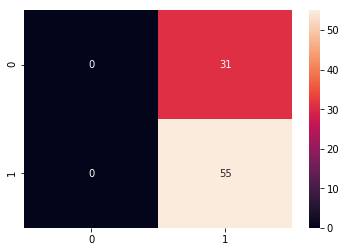

In [ ]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)
#Terrible aoucome!!!!!!

In [ ]:
print(classification_report(y_test, y_predict))
#Terrible result!!!

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        31
         1.0       0.64      1.00      0.78        55

   micro avg       0.64      0.64      0.64        86
   macro avg       0.32      0.50      0.39        86
weighted avg       0.41      0.64      0.50        86



/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
# improve the model (normalization):
min_train =X_train.min()
min_train

mean radius                  7.691000
mean texture                 9.710000
mean perimeter              47.920000
mean area                  170.400000
mean smoothness              0.052630
mean compactness             0.019380
mean concavity               0.000000
mean concave points          0.000000
mean symmetry                0.106000
mean fractal dimension       0.049960
radius error                 0.111500
texture error                0.360200
perimeter error              0.757000
area error                   7.228000
smoothness error             0.001713
compactness error            0.002252
concavity error              0.000000
concave points error         0.000000
symmetry error               0.007882
fractal dimension error      0.000895
worst radius                 8.678000
worst texture               12.020000
worst perimeter             54.490000
worst area                 223.600000
worst smoothness             0.071170
worst compactness            0.027290
worst concav

In [ ]:
range_train = (X_train - min_train).max()
range_train

mean radius                  19.729000
mean texture                 29.570000
mean perimeter              138.980000
mean area                  2330.600000
mean smoothness               0.089870
mean compactness              0.292020
mean concavity                0.426400
mean concave points           0.191300
mean symmetry                 0.168300
mean fractal dimension        0.047480
radius error                  2.435500
texture error                 4.524800
perimeter error              17.893000
area error                  534.972000
smoothness error              0.029417
compactness error             0.133148
concavity error               0.396000
concave points error          0.052790
symmetry error                0.051748
fractal dimension error       0.028945
worst radius                 27.362000
worst texture                35.140000
worst perimeter             196.710000
worst area                 4030.400000
worst smoothness              0.151430
worst compactness        

In [ ]:
X_train_scaled = (X_train - min_train)/ range_train

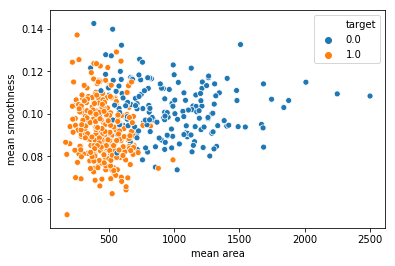

In [ ]:
# plot data
sns.scatterplot(x = X_train['mean area'], y = X_train['mean smoothness'], hue=y_train, data = df)

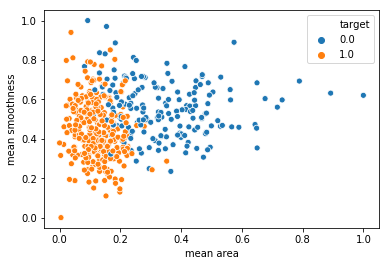

In [ ]:
sns.scatterplot(x = X_train_scaled['mean area'], y = X_train_scaled['mean smoothness'], hue=y_train, data = df)

In [ ]:
min_test =X_test.min()
range_test = (X_test - min_test).max()
X_test_scaled = (X_test - min_test)/ range_test

In [ ]:
# train again with scaled data
svc_model = SVC()
svc_model.fit(X_train_scaled, y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

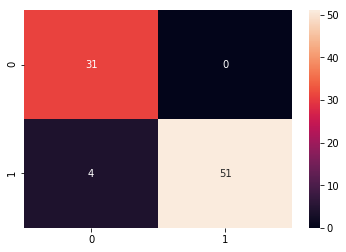

In [ ]:
y_predict_scaled = svc_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_predict_scaled)
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, y_predict_scaled))


              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94        31
         1.0       1.00      0.93      0.96        55

   micro avg       0.95      0.95      0.95        86
   macro avg       0.94      0.96      0.95        86
weighted avg       0.96      0.95      0.95        86



In [ ]:
#parameter optimization:
param_grid = {'C': [1, 0.1, 1,10,100,1000] , 'gamma': [10, 1,0.1,0.01, 0.001, 0.0001], 'kernel': ['rbf']}
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=4)

In [ ]:
 grid.fit(X_train_scaled, y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s


Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] C=1, gamma=10, kernel=rbf .......................................
[CV]  C=1, gamma=10, kernel=rbf, score=0.9259259259259259, total=   0.0s
[CV] C=1, gamma=10, kernel=rbf .......................................
[CV]  C=1, gamma=10, kernel=rbf, score=0.9503105590062112, total=   0.0s
[CV] C=1, gamma=10, kernel=rbf .......................................
[CV] .......... C=1, gamma=10, kernel=rbf, score=0.9375, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV]  C=1, gamma=1, kernel=rbf, score=0.9691358024691358, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV]  C=1, gamma=1, kernel=rbf, score=0.9813664596273292, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] .......... C=1, gamma=1, kernel=rbf, score=0.96875, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV]  C=1

[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:    1.5s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1, 0.1, 1, 10, 100, 1000], 'gamma': [10, 1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=4)

In [ ]:
grid.best_params_

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

In [ ]:
grid.best_estimator_

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [ ]:
grid_predict = grid.predict(X_test_scaled)
grid_predict

array([0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0.,
       1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1.,
       1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0.,
       0.])

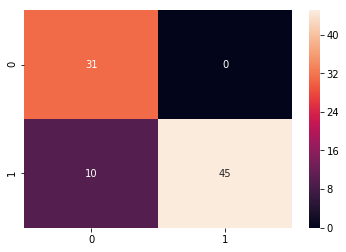

In [ ]:
cm= confusion_matrix(y_test, grid_predict)
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, grid_predict))
#not better result!!!!

              precision    recall  f1-score   support

         0.0       0.76      1.00      0.86        31
         1.0       1.00      0.82      0.90        55

   micro avg       0.88      0.88      0.88        86
   macro avg       0.88      0.91      0.88        86
weighted avg       0.91      0.88      0.89        86

